## Heart Disease Prediction
In this machine learning project i have collected data from Kaggle(https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci) and I will be using Machine Learning to predict whether any person is suffering from heart disease

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
df["ca"].value_counts()


0    174
1     65
2     38
3     20
Name: ca, dtype: int64

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


### Feature Selection



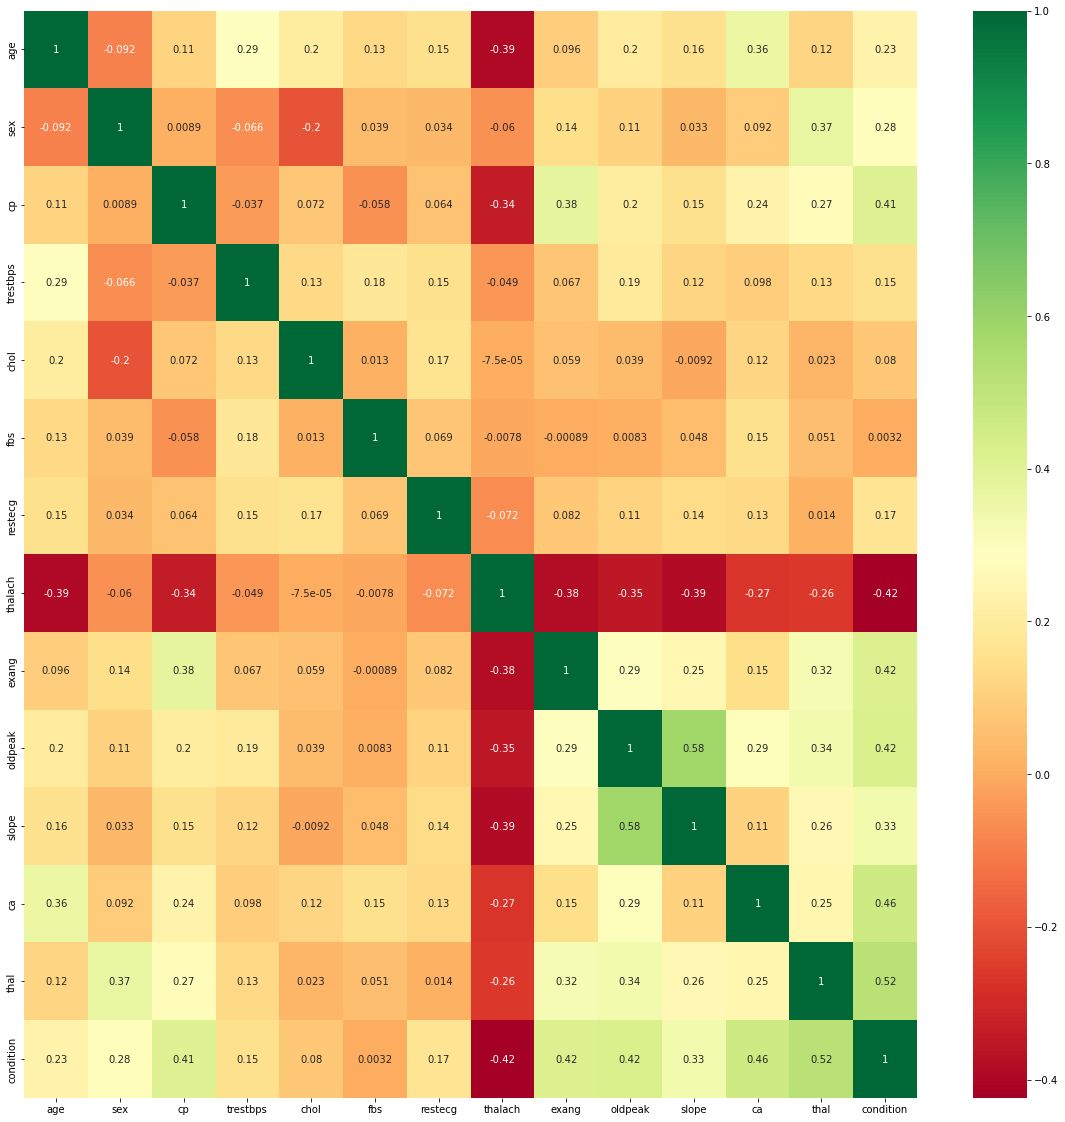

In [10]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:
from sklearn.feature_selection import VarianceThreshold

In [12]:
variance_thres=VarianceThreshold(threshold=0)
variance_thres.fit(df)

VarianceThreshold(threshold=0)

In [13]:
variance_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [14]:
constant_columns=[column for column in df.columns if column not in df.columns[variance_thres.get_support()]]

In [15]:
constant_columns


[]

In [16]:
df.drop(constant_columns, axis=1, inplace=True)

In [17]:

df.isnull().sum()


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

C:\Users\sneha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

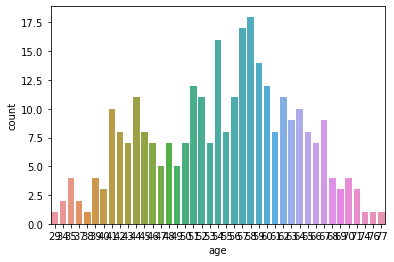

In [18]:
import seaborn as sns
sns.countplot(df["age"])

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'condition'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

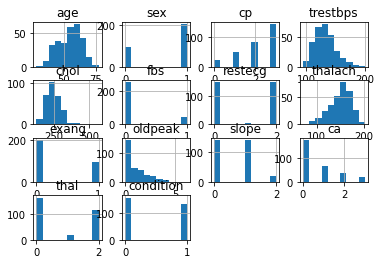

In [19]:

df.hist()

In [21]:
df["condition"].value_counts()

X=df.drop(["condition"], axis=1)


### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split


In [24]:
X_train,X_test,y_train,y_test=train_test_split(X, df["condition"], test_size=.25, random_state=42)

## Applying Logistic Regression 

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr=LogisticRegression()

In [27]:
lr.fit(X_train,y_train)

C:\Users\sneha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_pred=lr.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score


We will be experienting with two algorithms
1. KNeighborsClassifier
2.RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [33]:

rf=RandomForestClassifier()


In [34]:

rf.fit(X_train,y_train)

RandomForestClassifier()

In [35]:

y_pred_rf=rf.predict(X_test)


In [36]:
cf1=confusion_matrix(y_test,y_pred_rf)

In [37]:

print(cf1)

[[29  9]
 [ 8 29]]


In [38]:
error_rate=[]

# We will run from k1 to k40. will take time to run

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error rate')

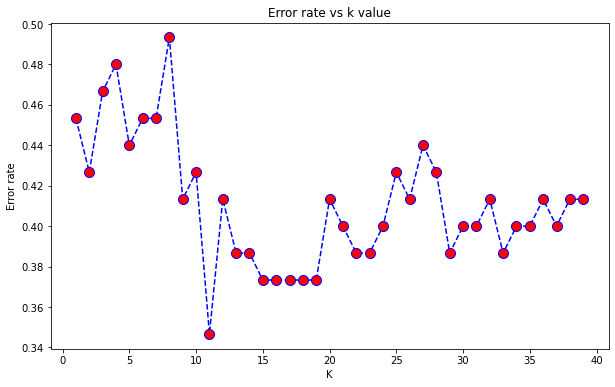

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate, color="blue",linestyle="dashed",marker='o',markerfacecolor='red',markersize=10)
plt.title("Error rate vs k value")
plt.xlabel("K")
plt.ylabel("Error rate")


In [40]:
    knn=KNeighborsClassifier(n_neighbors=11)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)

In [41]:
cf2=confusion_matrix(y_test,pred_i)

In [42]:
print(cf2)

[[25 13]
 [13 24]]


In [43]:
# save the model to disk
filename = 'heart_model.pkl'
pickle.dump(lr, open(filename, 'wb'))